In [1]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
import random
%matplotlib inline

#Understanding the Data

In [30]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


In [31]:
def plot_features(trainset, testset=None, spc_feature = None):
  import matplotlib.pyplot as plt
  features = trainset.describe().columns.to_list()
  if testset is None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature is None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1
  elif testset is not None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature == None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          plt.hist(testset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.scatter(testset[i], testset[spc_feature],  color='red')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1

In [32]:
file_name_dataset = 'FuelConsumptionCo2.csv'
df = pd.read_csv(file_name_dataset)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [33]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2).highlight_null(color='#f1f1f1')

<ipython-input-34-d65b0c965d28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,nan,nan,nan,nan,nan,nan,nan,nan
ENGINESIZE,nan,1.00,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,nan,0.93,1.00,0.80,0.72,0.78,-0.77,0.85
FUELCONSUMPTION_CITY,nan,0.83,0.80,1.00,0.97,1.00,-0.94,0.90
FUELCONSUMPTION_HWY,nan,0.78,0.72,0.97,1.00,0.99,-0.89,0.86
FUELCONSUMPTION_COMB,nan,0.82,0.78,1.00,0.99,1.00,-0.93,0.89
FUELCONSUMPTION_COMB_MPG,nan,-0.81,-0.77,-0.94,-0.89,-0.93,1.00,-0.91
CO2EMISSIONS,nan,0.87,0.85,0.90,0.86,0.89,-0.91,1.00


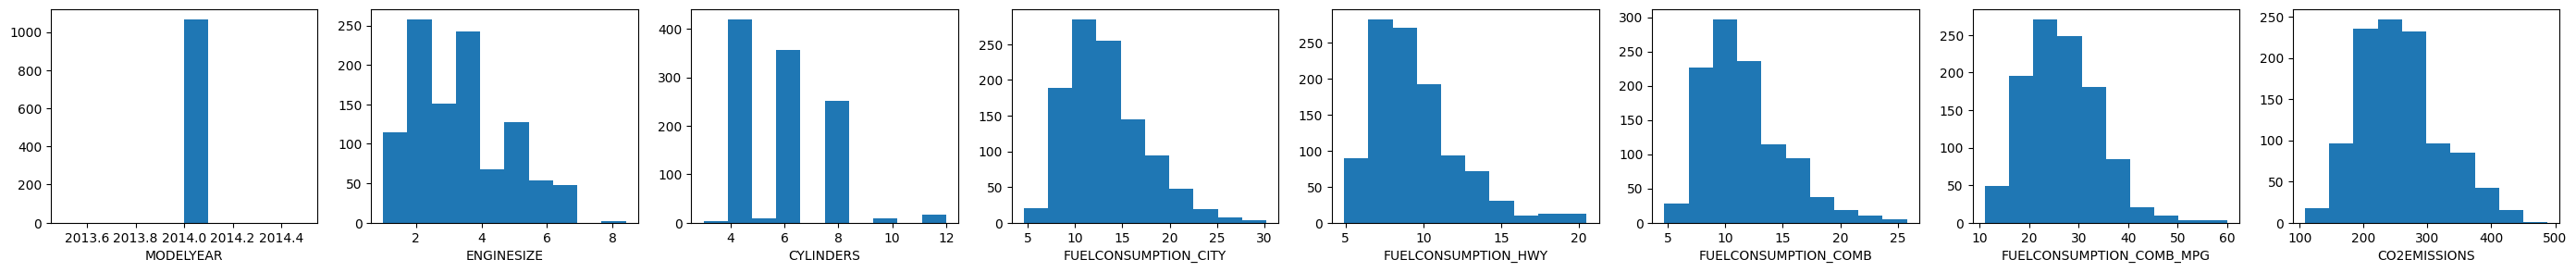

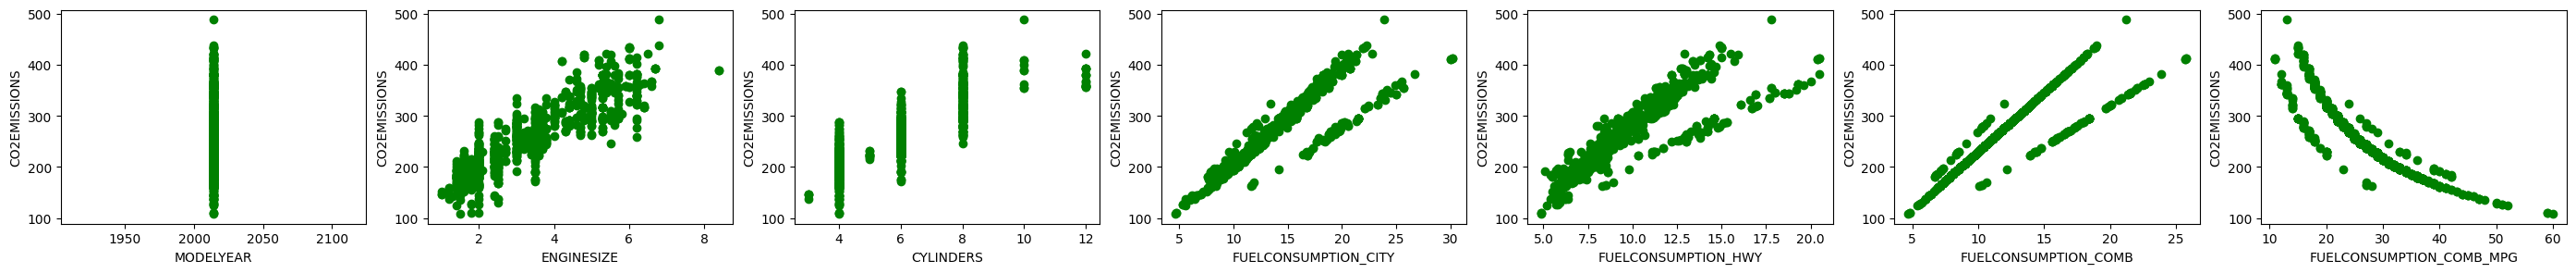

In [35]:
plot_features(df)
plot_features(df, spc_feature = 'CO2EMISSIONS')

In [39]:
#select some features using for regression.
features_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
data = df[features_list]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


#Creating train and test dataset

In [40]:
#Create 2 sets: train set and test set
#create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(data)) < 0.8 #select random rows (< 80% of len(df))
print('number of rows in df: ',len(data))
print('number of values in msk: ',len(msk))
print('number of True in msk: ',msk.sum(),'ratio: ',msk.sum()/len(msk))
print('number of False in msk: ',(~msk).sum(),'ratio: ',(~msk).sum()/len(msk))
#np.random.rand(n) => n random values [0,1) => condition: random values > 0.8 => True
train = data[msk] #cdf of True
test = data[~msk] #~msk: True => False and False => True, cdf[~msk]: cdf of False

number of rows in df:  1067
number of values in msk:  1067
number of True in msk:  832 ratio:  0.7797563261480788
number of False in msk:  235 ratio:  0.22024367385192128


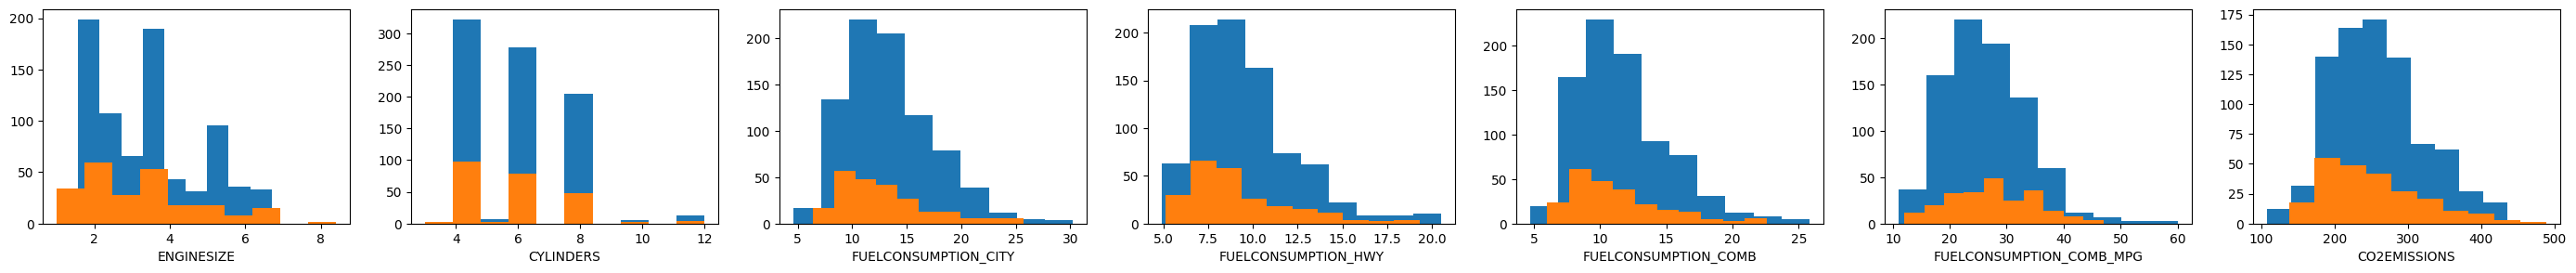

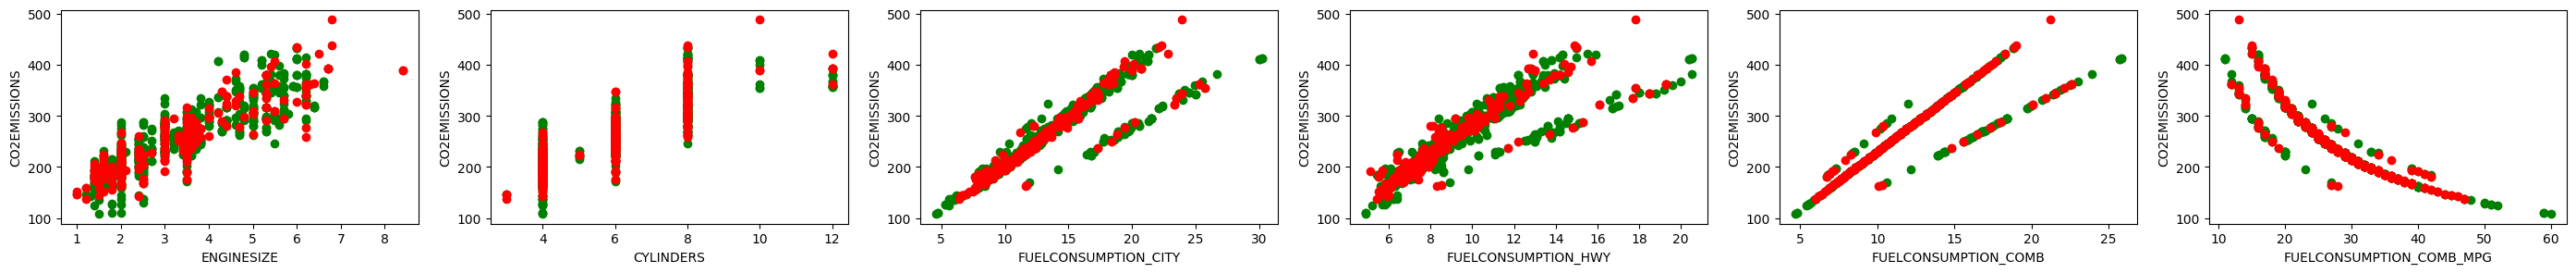

In [41]:
plot_features(train[features_list], test[features_list])
plot_features(train[features_list], test[features_list] ,spc_feature = 'CO2EMISSIONS')

#Data Preparation

In [42]:
def data_prepare (data) :
  data = data.to_numpy()
  X = data [: , :-2]
  Y = data [: , -1]
  X = np.concatenate((np.ones((len(X),1)),X), axis=1)
  return X , Y

In [43]:
X_train, Y_train = data_prepare (train)
X_test, Y_test = data_prepare (test)

print (X_train[:5 ,:])
print (Y_train.shape)

[[ 1.   2.   4.   9.9  6.7  8.5]
 [ 1.   2.4  4.  11.2  7.7  9.6]
 [ 1.   1.5  4.   6.   5.8  5.9]
 [ 1.   3.5  6.  12.7  9.1 11.1]
 [ 1.   3.5  6.  12.1  8.7 10.6]]
(832,)


#Modeling

In [61]:
class run_GA :
  def __init__(self, X, Y, n_generations, pop_nums, elitism, gen, crossover_rate, mutation_rate):
    self._X = X
    self._Y = Y
    self._n_generations = n_generations
    self._pop_nums = pop_nums
    self._elitism = elitism
    self._gen = gen
    self._crossover_rate = crossover_rate
    self._mutation_rate = mutation_rate
    self.fix()

  def initializePopulation (self) :
    population = [self.create_individual() for _ in range(self._pop_nums)]
    return population
  def create_individual(self):
    bound=10
    individual = []
    for i in range(self._X.shape[1]):
      individual.append(np.random.uniform(-bound/2, bound/2))
    return individual

  def fix(self):
    population = self.initializePopulation()
    self._losses_list = []
    self._population_list = []
    for i in range (self._n_generations) :
      print(f'Generation {i}: ')
      new_population, losses = self.create_new_population(population)
      self._losses_list.append(losses)
      self._population_list.append(new_population)
      population = new_population
    return self._population_list, self._losses_list

  def predict(self, X):
    best_population = self._population_list [-1]
    sorted_population = self.sorted_old_population(best_population)
    theta = np.array ( sorted_population [-1])
    Y_hat = X.dot(theta)
    return Y_hat

  def compute_fitness (self, individual) :
    loss = self.compute_loss (individual)
    fitness_value = 1/(loss+1)
    return fitness_value
  def compute_loss (self, individual) :
    theta = np.array(individual)
    Y_hat = self._X.dot(theta)
    self._loss = np.multiply((Y_hat - self._Y),(Y_hat - self._Y)).mean()
    return self._loss

  def create_new_population(self, population) :
    m = len (population)
    sorted_population = self.sorted_old_population(population)
    if self._gen %1 == 0:
      print ("Best loss:" , self.compute_loss (sorted_population [m -1]) , " with chromsome : " , sorted_population [m -1])
    new_population = []
    while len ( new_population ) < m - self._elitism :
      # selection
      individual_s1 = self.selection (sorted_population)
      individual_s2 = self.selection (sorted_population)
      # crossover
      individual_t1, individual_t2 = self.crossover(individual_s1, individual_s2)
      # mutation
      individual_m1 = self.mutate(individual_t1)
      individual_m2 = self.mutate(individual_t2)
      new_population.append(individual_m1)
      new_population.append(individual_m2)
    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - self._elitism:]:
      new_population.append(ind.copy())
    return new_population , self.compute_loss (sorted_population [m-1])

  def crossover (self, individual1 , individual2) :
    individual1_new = individual1 . copy ()
    individual2_new = individual2 . copy ()
    for id in range(len(individual1_new)):
      rate = np.random.random()
      if rate < self._crossover_rate:
        individual1_new[id] = individual2[id]
        individual2_new[id] = individual1[id]
    return individual1_new , individual2_new

  def mutate (self, individual) :
    individual_m = individual.copy ()
    for id in range(len(individual_m)):
      rate = np.random.random()
      if rate < self._mutation_rate:
        individual_m[id] = self.generate_random_value()
    return individual_m

  def generate_random_value(self):
    bound = 10
    return (random.random() - 0.5)*bound

  def selection (self, sorted_old_population) :
    m = len(sorted_old_population) - self._elitism
    index1 = random . randint (0 , m -1)
    while True :
      index2 = random . randint (0 , m -1)
      if ( index2 != index1 ) :
        break
    individual_s = sorted_old_population [ index1 ]
    if index2 > index1 :
      individual_s = sorted_old_population [ index2 ]
    return individual_s

  def sorted_old_population(self, population):
    sorted_old_population = sorted(population, key = self.compute_fitness )
    return sorted_old_population

  def visualize_loss (self) :
    plt.plot(self._losses_list)
    plt.plot(self._losses_list.index(min(self._losses_list)),min(self._losses_list),'ro', markersize=2)

  def visualize_predict_gt (self) :
    best_population = self._population_list [-1]
    sorted_population = self.sorted_old_population(best_population)
    print ( sorted_population [ -1])
    theta = np . array ( sorted_population [-1])
    estimated_prices = []
    for feature in self._X :
      estimated_prices.append(feature@theta)
    fig,ax = plt.subplots ( figsize =(10 , 6) )
    plt.xlabel ( 'Samples')
    plt.ylabel ( 'Price')
    plt.plot (self._Y, c = 'green' , label = 'Real Prices')
    plt.plot ( estimated_prices , c = 'blue' , label = 'Estimated Prices')
    plt.legend ()
    plt.show ()

In [64]:
model = run_GA(X_train, Y_train, n_generations = 1000, pop_nums = 1000, elitism = 2, gen = 1, crossover_rate = 0.9, mutation_rate = 0.05)

Generation 0: 
Best loss: 6310.629891392939  with chromsome :  [3.082695893952227, 4.704670298207752, 0.6785115545407159, 4.644947947121436, 4.297053789509283, 4.844908152824779]
Generation 1: 
Best loss: 6310.629891392939  with chromsome :  [3.082695893952227, 4.704670298207752, 0.6785115545407159, 4.644947947121436, 4.297053789509283, 4.844908152824779]
Generation 2: 
Best loss: 6310.629891392939  with chromsome :  [3.082695893952227, 4.704670298207752, 0.6785115545407159, 4.644947947121436, 4.297053789509283, 4.844908152824779]
Generation 3: 
Best loss: 5234.470651404361  with chromsome :  [1.192501025470257, -0.2791191226411127, 4.838296681473977, 4.9605456949316356, 3.872149132487234, 4.992902965245069]
Generation 4: 
Best loss: 5234.470651404361  with chromsome :  [1.192501025470257, -0.2791191226411127, 4.838296681473977, 4.9605456949316356, 3.872149132487234, 4.992902965245069]
Generation 5: 
Best loss: 2925.4992646871365  with chromsome :  [4.429912912352823, 4.80742108819177,

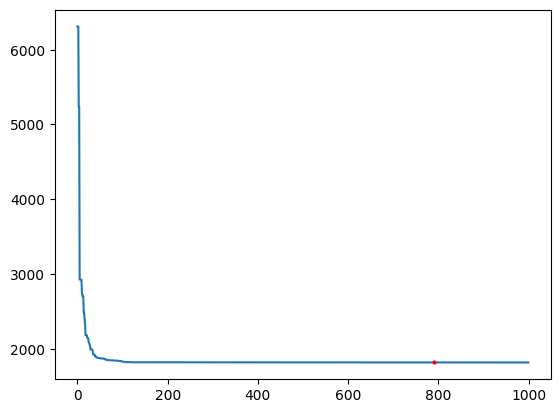

In [67]:
model.visualize_loss()

[4.996828668000724, 4.999819370962216, 4.999900518053639, 4.998906453163812, 4.998960133037526, 4.998450775130169]


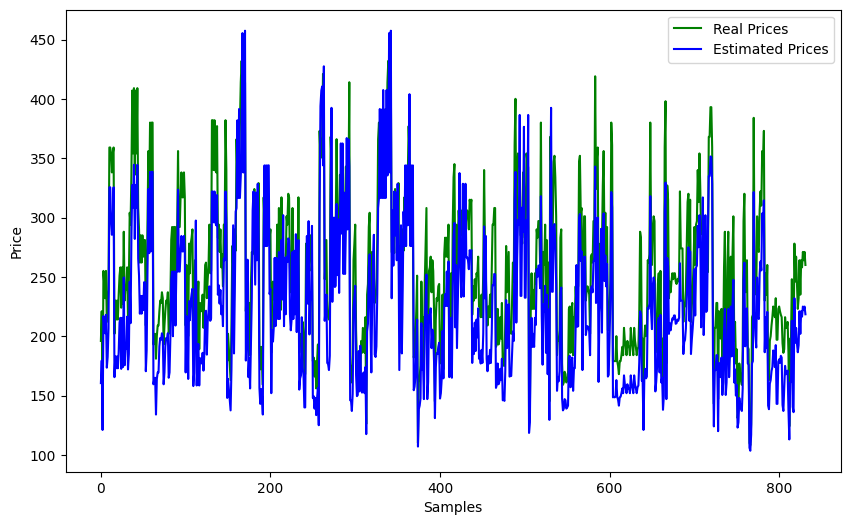

In [68]:
model.visualize_predict_gt()

In [70]:
y_hat = model.predict(X_train)
#Evaluate regression model
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"% np.mean((y_hat - Y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % (r2_score(y_hat, Y_train).tolist()))

Residual sum of squares: 1817.95
Variance score: 0.56


# Evaluating

In [71]:
y_hat = model.predict(X_test)
#Evaluate regression model
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"% np.mean((y_hat - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % (r2_score(y_hat, Y_test).tolist()))

Residual sum of squares: 1765.70
Variance score: 0.60
